# Visualize Unlabelled Predictions

This notebook visualizes predictions produced by `predict_unlabelled_resnet50.py`.

It expects a CSV file with the columns:
- `image_path`
- `pred_class_index`
- `pred_class_label`
- `confidence`

The notebook will create:
- a bar chart of predicted class counts, and
- a histogram of prediction confidences.

In [1]:
# Imports
import csv
import os
from collections import Counter
from typing import List, Tuple

import matplotlib.pyplot as plt

In [2]:
# Helper functions copied from visualize_unlabelled_predictions.py,
# slightly adapted to be used interactively in this notebook.

def read_predictions(csv_path: str) -> Tuple[List[str], List[str], List[float]]:
    """Read predictions CSV and return image paths, labels and confidences.

    Returns three lists: image_paths, labels, confidences.
    """

    image_paths: List[str] = []
    labels: List[str] = []
    confidences: List[float] = []

    with open(csv_path, 'r', newline='') as f:
        reader = csv.DictReader(f)
        for row in reader:
            image_paths.append(row['image_path'])

            # Prefer human-readable label; fall back to index if empty.
            label = row.get('pred_class_label') or row.get('pred_class_index', '')
            labels.append(str(label))

            try:
                conf = float(row['confidence'])
            except (KeyError, ValueError):
                conf = 0.0
            confidences.append(conf)

    return image_paths, labels, confidences


def plot_class_distribution(labels: List[str], output_path: str = None) -> None:
    """Plot a bar chart of predicted class counts.

    If `output_path` is given, save the figure there; otherwise just display it.
    """

    counts = Counter(labels)

    # Sort classes by count (descending) for a cleaner plot.
    classes, freqs = zip(*sorted(counts.items(), key=lambda x: x[1], reverse=True))

    plt.figure(figsize=(max(6, 0.5 * len(classes)), 4))
    plt.bar(range(len(classes)), freqs)
    plt.xticks(range(len(classes)), classes, rotation=90)
    plt.xlabel('Predicted class')
    plt.ylabel('Number of images')
    plt.title('Predicted class distribution (unlabelled data)')
    plt.tight_layout()
    if output_path is not None:
        plt.savefig(output_path, dpi=200)
    plt.show()


def plot_confidence_histogram(confidences: List[float], output_path: str = None) -> None:
    """Plot histogram of prediction confidences.

    If `output_path` is given, save the figure there; otherwise just display it.
    """

    plt.figure(figsize=(6, 4))
    plt.hist(confidences, bins=20, range=(0.0, 1.0), edgecolor='black')
    plt.xlabel('Prediction confidence')
    plt.ylabel('Number of images')
    plt.title('Prediction confidence histogram (unlabelled data)')
    plt.tight_layout()
    if output_path is not None:
        plt.savefig(output_path, dpi=200)
    plt.show()

## Configure paths

Set the path to the predictions CSV file produced by `predict_unlabelled_resnet50.py`,
and choose an optional output directory for saving the plots (can be left empty to
only show the figures inline).

In [7]:
# Path to the CSV with predictions (edit this to your file)
pred_csv_path = '/mnt/class_data/Nele/ROIs_August2024/predictions_resnet50_St01.csv'

# Optional: directory where plots will be saved; if empty, figures are only shown inline.
output_dir = 'visualizations_unlabelled_notebook'

# Create output directory if specified.
if output_dir:
    os.makedirs(output_dir, exist_ok=True)

pred_csv_path

'/mnt/class_data/Nele/ROIs_August2024/predictions_resnet50_St01.csv'

## Load predictions

This cell reads the CSV file and reports how many predictions were loaded.

In [8]:
# Read predictions from the CSV file.
if not os.path.exists(pred_csv_path):
    raise FileNotFoundError(f'Predictions CSV not found: {pred_csv_path}')

image_paths, labels, confidences = read_predictions(pred_csv_path)
len(image_paths), image_paths[:5]

(44412,
 ['/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0001.tiff_ROI_15.tif',
  '/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0001.tiff_ROI_6.tif',
  '/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0001.tiff_ROI_8.tif',
  '/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0002.tiff_ROI_10.tif',
  '/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0002.tiff_ROI_19.tif'])

## Plot class distribution

Bar chart of how often each predicted class occurs in the unlabelled data.

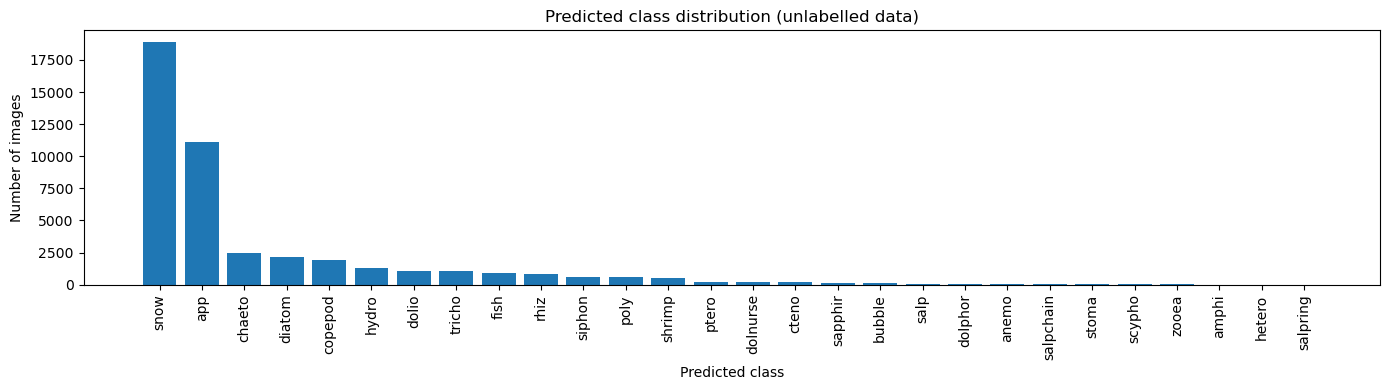

In [9]:
# Plot and optionally save the class distribution.
class_dist_path = os.path.join(output_dir, 'class_distribution.png') if output_dir else None
plot_class_distribution(labels, class_dist_path)

## Plot confidence histogram

Histogram of model prediction confidences, to see how certain the model is overall.

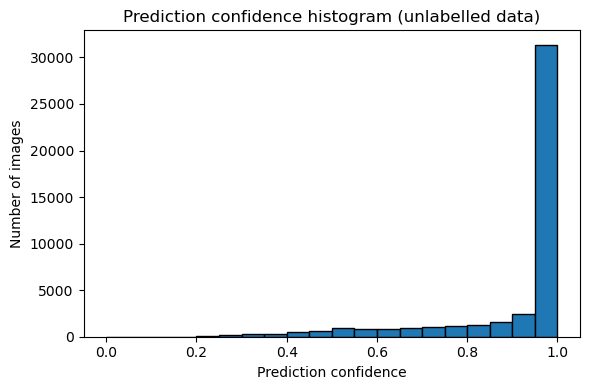

In [10]:
# Plot and optionally save the confidence histogram.
conf_hist_path = os.path.join(output_dir, 'confidence_histogram.png') if output_dir else None
plot_confidence_histogram(confidences, conf_hist_path)